# The tipping problem using fuzzy logic

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Membership function

In [8]:
# define two inputs or antecedent(service and food quality) and one output or consequent(tip)
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(3)
service.automf(3)

/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


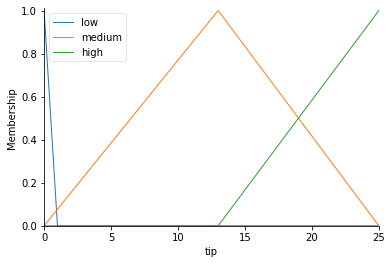

In [18]:
# define 3 tip levels 
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 1])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])


#the average inside the bracket highlights the average line in the figure
#quality['average'].view()
#service.view()

# view the tip
tip.view()

### Rules Defination

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

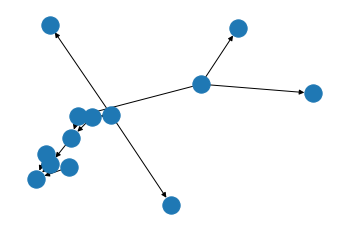

In [24]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule2 = ctrl.Rule(quality['average'] & service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] & service['good'], tip['high'])

rule1.view
rule1.view()

### Control System

In [26]:
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(tip_ctrl)

In [28]:
sim.input['quality'] = 6.9
sim.input['service'] = 9.8
sim.compute()
print(sim.output['tip'])

18.399492328092446


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


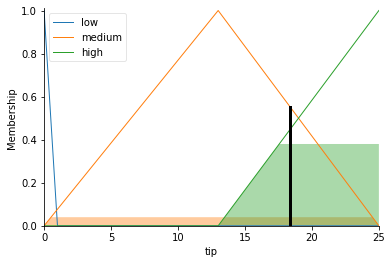

In [29]:
tip.view(sim=sim)